In [25]:
import numpy as np
import json

In [28]:
influence_values = np.load('outputs/MNIST/test/image_classifier/influence_function_softmax/use_hessian:True,norm_grad:True/influence_values.npy')
influence_values_rep = np.load('outputs/MNIST/test/image_classifier/representer_points_with_sec/influence_values.npy')
training_idx, validation_idx = [json.load(open(f'outputs/MNIST/test/image_classifier/influence_function_softmax/use_hessian:True,norm_grad:True/{x}_idx.json')) for x in ['training', 'validation']]

In [29]:
pred = [json.loads(line) for line in open("outputs/MNIST/test/image_classifier/predictions.dev.jsonl")]

In [30]:
devclasses = [p['gold_labels'] for p in pred]
influence_values_rep = np.concatenate([influence_values_rep[i, :, p][None, :] for i, p in enumerate(devclasses)], axis=0)

(array([59., 71., 50., 48., 66., 72., 62., 37., 24., 11.]),
 array([-0.69234807, -0.65135359, -0.61035911, -0.56936463, -0.52837014,
        -0.48737566, -0.44638118, -0.4053867 , -0.36439222, -0.32339774,
        -0.28240326]),
 <BarContainer object of 10 artists>)

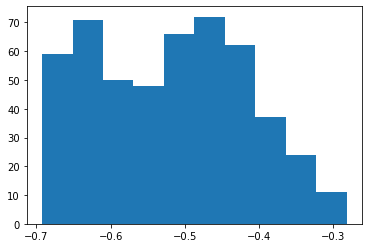

In [31]:
from scipy.stats import spearmanr
corr = [spearmanr(x, y).correlation for x, y in zip(influence_values, influence_values_rep)]

import matplotlib.pyplot as plt 
plt.hist(corr)

In [57]:
influence_values.min()

-1238.6382

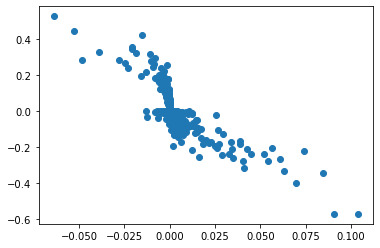

In [49]:
plt.scatter(influence_values[200], influence_values_rep[200])

In [32]:
from influence_info.dataset_readers.image_reader import ImageReader
reader = ImageReader(as_is=True)
training_data = {i: (image, label) for (i, image, label) in list(reader._read('train'))}
validation_data = {i: (image, label) for (i, image, label) in list(reader._read('dev'))}

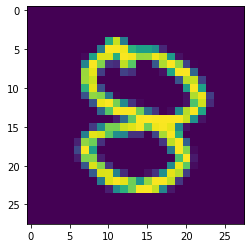

---
0.0008781299
0.00084761775
0.00078833645
0.0007852741
0.0007830717


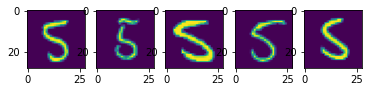

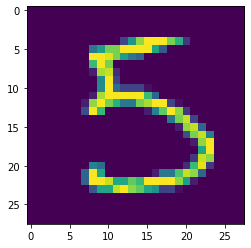

---
0.0010723803
0.0009927539
0.00097556453
0.00096623367
0.00094829587


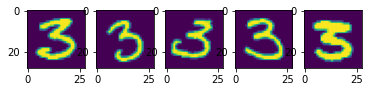

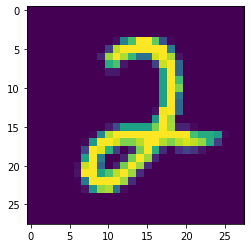

---
0.0007926912
0.0007511118
0.0007455667
0.00073171913
0.000716273


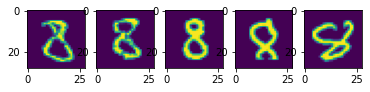

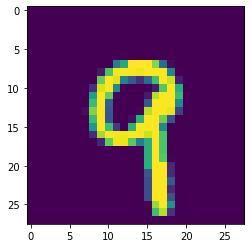

---
0.0010367986
0.0010310033
0.0010256286
0.001025331
0.0010247115


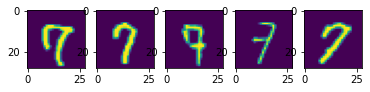

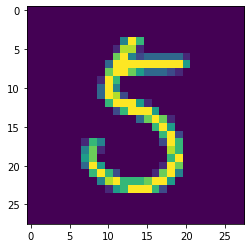

---
0.0010576596
0.001055819
0.0010466918
0.0010437308
0.0010169647


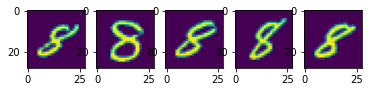

In [34]:
import random
import matplotlib.pyplot as plt

for i in range(5) :
    i = random.randint(0, 450)
    v = validation_data[i]
    plt.imshow(v[0][0])
    plt.show()
    print("---")
    vals = influence_values[i, :]
    top = np.argsort(vals)[-5:]
    fig = plt.figure()
    for k, j in enumerate(top[::-1]) :
        print(vals[j])
        plt.subplot(1, 5, k + 1)
        plt.imshow(training_data[j][0][0])
    plt.show()
    print("==="*10)

In [ ]:
influence_values.shape